# Blue Winery Machine Learning

In [591]:
import numpy as np
import pandas as pd

red_wine_df=pd.read_csv('winequality-red.csv', sep=';')

red_wine_df['quality_label']=red_wine_df['quality'].apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')

red_wine_df['quality_label'] = pd.Categorical(red_wine_df['quality_label'],categories=['low','medium','high'])

white_wine_df=pd.read_csv('winequality-white.csv', sep=';')

white_wine_df['quality_label']=white_wine_df['quality'].apply(lambda value: 'low' if value <=5 else 'medium' if value <=7 else 'high')

white_wine_df['quality_label'] = pd.Categorical(white_wine_df['quality_label'],categories=['low','medium','high'])

white_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,medium
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,low
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,medium
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,medium


In [637]:

white_wine_df['wine type']='white'
red_wine_df['wine type']='red'

white_wine_df['wine type']=pd.Categorical(white_wine_df['wine type'], categories=['white'])
red_wine_df['wine type']=pd.Categorical(red_wine_df['wine type'], categories=['red'])

ww_df=white_wine_df
rw_df=red_wine_df

rw_df_2=rw_df.rename(columns={"fixed acidity":"fixed acidity g/dm3","volatile acidity":"volatile acidity g/dm3",\
                              "citric acid":"citric acid g/dm3","residual sugar":"residual sugar g/dm3",\
                                "chlorides":"chlorides g/dm3","free sulfur dioxide":"free sulfur dioxide mg/dm3",\
                                    "total sulfur dioxide":"total sulfur dioxide mg/dm3","density":"density g/cm3",\
                                        "sulphates":"sulphates g/dm3","alcohol":"alcohol % vol"})
ww_df_2=ww_df.rename(columns={"fixed acidity":"fixed acidity g/dm3","volatile acidity":"volatile acidity g/dm3",\
                              "citric acid":"citric acid g/dm3","residual sugar":"residual sugar g/dm3",\
                                "chlorides":"chlorides g/dm3","free sulfur dioxide":"free sulfur dioxide mg/dm3",\
                                    "total sulfur dioxide":"total sulfur dioxide mg/dm3","density":"density g/cm3",\
                                        "sulphates":"sulphates g/dm3","alcohol":"alcohol % vol"})

#     #   add underscore between word
rw_df_2.columns=rw_df_2.columns.str.lower().str.replace(" ","_")
ww_df_2.columns=ww_df_2.columns.str.lower().str.replace(" ","_")

red_white_wines_df = pd.concat([ww_df_2, rw_df_2], ignore_index=True)

red_white_wines_df



,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality,quality_label,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,medium,white
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,medium,white
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,medium,white
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,medium,white
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,low,red
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,medium,red
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,medium,red
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,low,red


In [593]:
# describe and show in transpose view
red_white_wines_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed_acidity_g/dm3,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile_acidity_g/dm3,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric_acid_g/dm3,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual_sugar_g/dm3,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides_g/dm3,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free_sulfur_dioxide_mg/dm3,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total_sulfur_dioxide_mg/dm3,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density_g/cm3,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
ph,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates_g/dm3,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


In [631]:
import seaborn as sns
import matplotlib.pyplot as plt

# in order to display plot in jupyter.
%matplotlib inline

# Import necessary modules
from sklearn.linear_model import LogisticRegression 

from sklearn.model_selection import train_test_split  
from sklearn.metrics import confusion_matrix, classification_report

red_white_wines_df_ML = red_white_wines_df.copy()
# red_white_wines_df_ML.head()

# # show datatype for each column
print(red_white_wines_df_ML.dtypes)

#show columns containing numbers (int64 , float64)
num_col= red_white_wines_df_ML.select_dtypes('number').columns
print(num_col)

#show columns containing object (NOT string such as dtype category)
string_col = red_white_wines_df_ML.select_dtypes(include="object").columns
print(string_col)

#show columns containing categories
category_col = red_white_wines_df_ML.select_dtypes('category').columns
print(category_col)
red_white_wines_df_ML.head()

fixed_acidity_g/dm3             float64
volatile_acidity_g/dm3          float64
citric_acid_g/dm3               float64
residual_sugar_g/dm3            float64
chlorides_g/dm3                 float64
free_sulfur_dioxide_mg/dm3      float64
total_sulfur_dioxide_mg/dm3     float64
density_g/cm3                   float64
ph                              float64
sulphates_g/dm3                 float64
alcohol_%_vol                   float64
quality                           int64
quality_label                  category
wine_type                        object
dtype: object
Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
       'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
       'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
       'alcohol_%_vol', 'quality'],
      dtype='object')
Index(['wine_type'], dtype='object')
Index(['quality_label'], dtype='object')


,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white


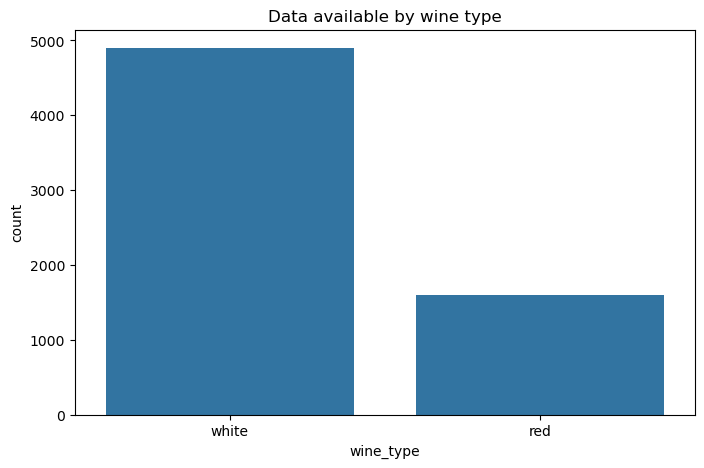

In [633]:
# Overview Data Available
red_white_wines_df_ML.head()
plt.figure(figsize=(8,5))
sns.countplot(data=red_white_wines_df_ML,x='wine_type')
plt.title('Data available by wine type')
plt.show()


# Predict Wine type


In [663]:
from sklearn.preprocessing import LabelEncoder

red_white_wines_df_ML_1=red_white_wines_df_ML.copy()

le = LabelEncoder()
red_white_wines_df_ML_1['wine_type'] = le.fit_transform(red_white_wines_df_ML_1['wine_type'])

red_white_wines_df_ML_1['wine_type'].tail()

6492    0
6493    0
6494    0
6495    0
6496    0
Name: wine_type, dtype: int32

In [646]:
#quality label removed

###     improve accuracy= remove quality feature?

red_white_wines_df_ML_wine_type= red_white_wines_df_ML_1.select_dtypes('number')

red_white_wines_df_ML_wine_type.columns


Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
       'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
       'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
       'alcohol_%_vol', 'quality', 'wine_type'],
      dtype='object')

In [647]:
from sklearn.model_selection import train_test_split

X = red_white_wines_df_ML_wine_type.drop('wine_type', axis=1)
y = red_white_wines_df_ML_wine_type['wine_type']

print("original:", red_white_wines_df_ML_wine_type.shape, "\nX:", X.shape, "\ny:", y.shape)


original: (6497, 13) 
X: (6497, 12) 
y: (6497,)


In [648]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [649]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(max_iter=895)

In [650]:
LR_model.fit(X_train, y_train)

LogisticRegression(max_iter=895)

In [651]:
preds_LR_WT = LR_model.predict(X_test)
preds_LR_WT

array([1, 1, 1, ..., 0, 0, 0])

In [652]:
actual_results_WT = y_test
actual_results_WT

3103    1
1419    1
4761    1
4690    1
4032    1
       ..
889     1
2850    1
4917    0
5198    0
5643    0
Name: wine_type, Length: 1300, dtype: int32

In [653]:
from sklearn.metrics import accuracy_score 

acc_LR_WT = accuracy_score(actual_results_WT, preds_LR_WT)
acc_LR_WT

0.9792307692307692

In [654]:
from sklearn.ensemble import RandomForestClassifier

In [655]:
RF_clf = RandomForestClassifier()

In [656]:
RF_clf.fit(X_train, y_train)

RandomForestClassifier()

In [657]:
preds_RF_WT = RF_clf.predict(X_test)
preds_RF_WT

array([1, 1, 1, ..., 0, 0, 0])

In [658]:
acc_RF_WT = accuracy_score(actual_results_WT, preds_RF_WT)
acc_RF_WT

0.9961538461538462


# Predict Quality Labels


In [659]:
red_white_wines_df.head(18)

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium,white
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium,white
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,medium,white
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium,white
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium,white
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,medium,white


In [660]:
# quality_label

red_white_wines_df_ML_2 = red_white_wines_df.copy()
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
red_white_wines_df_ML_2['quality_label'] = le.fit_transform(red_white_wines_df_ML_2['quality_label'])
red_white_wines_df_ML_2['wine_type'] = le.fit_transform(red_white_wines_df_ML_2['wine_type'])

red_white_wines_df_ML_2['quality_label'].head(18)
red_white_wines_df_ML_2.head(18)

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality,quality_label,wine_type
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2,1
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2,1
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2,1
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2,1
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,2,1
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,2,1
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,2,1
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,2,1
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,2,1
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6,2,1


In [612]:
# quality removed

###     improve accuracy= remove some features?

red_white_wines_df_ML_quality_label= red_white_wines_df_ML_2.drop('quality', axis=1)


red_white_wines_df_ML_quality_label.columns

Index(['fixed_acidity_g/dm3', 'volatile_acidity_g/dm3', 'citric_acid_g/dm3',
       'residual_sugar_g/dm3', 'chlorides_g/dm3', 'free_sulfur_dioxide_mg/dm3',
       'total_sulfur_dioxide_mg/dm3', 'density_g/cm3', 'ph', 'sulphates_g/dm3',
       'alcohol_%_vol', 'quality_label', 'wine_type'],
      dtype='object')

In [613]:
red_white_wines_df_ML_quality_label

,fixed_acidity_g/dm3,volatile_acidity_g/dm3,citric_acid_g/dm3,residual_sugar_g/dm3,chlorides_g/dm3,free_sulfur_dioxide_mg/dm3,total_sulfur_dioxide_mg/dm3,density_g/cm3,ph,sulphates_g/dm3,alcohol_%_vol,quality_label,wine_type
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,2,1
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,2,1
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,2,1
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,1
4,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1,0
6493,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,2,0
6494,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,2,0
6495,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1,0


In [614]:
# from sklearn.model_selection import train_test_split

X_ql = red_white_wines_df_ML_quality_label.drop('quality_label', axis=1)
y_ql = red_white_wines_df_ML_quality_label['quality_label']

print("original:", red_white_wines_df_ML_quality_label.shape, "\nX_ql:", X_ql.shape, "\ny_ql:", y_ql.shape)

original: (6497, 13) 
X_ql: (6497, 12) 
y_ql: (6497,)


In [615]:
X_ql_train, X_ql_test, y_ql_train, y_ql_test = train_test_split(X_ql, y_ql, test_size=0.2, random_state=42)

In [616]:
# from sklearn.linear_model import LogisticRegression

LR_model_ql = LogisticRegression(max_iter=7200)
LR_model_ql.fit(X_ql_train, y_ql_train)

LogisticRegression(max_iter=7200)

In [617]:
preds_LR_QL = LR_model_ql.predict(X_ql_test)
preds_LR_QL

array([2, 2, 2, ..., 2, 2, 1])

In [618]:
actual_results_QL = y_ql_test
actual_results_QL

3103    2
1419    2
4761    2
4690    2
4032    1
       ..
889     2
2850    1
4917    2
5198    2
5643    2
Name: quality_label, Length: 1300, dtype: int32

In [619]:
# from sklearn.metrics import accuracy_score 

LR_QL_acc = accuracy_score(actual_results_QL, preds_LR_QL)
LR_QL_acc

0.7230769230769231

In [620]:
RF_clf_ql = RandomForestClassifier(random_state=42)

In [621]:
RF_clf_ql.fit(X_ql_train,y_ql_train)

RandomForestClassifier(random_state=42)

In [622]:
preds_RF_QL = RF_clf_ql.predict(X_ql_test)
preds_RF_QL

array([2, 2, 2, ..., 1, 2, 2])

In [623]:
RF_QL_acc = accuracy_score(actual_results_QL, preds_RF_QL)
RF_QL_acc

0.83

# Confusion matrix

## wine type

In [624]:
# check overall accuracy %
LR_WT_acc = accuracy_score(actual_results_WT, preds_LR_WT)
RF_WT_acc = accuracy_score(actual_results_WT, preds_RF_WT)

print("Logistic Regression: ", LR_WT_acc, "\nRandom Forest: ", RF_WT_acc)

Logistic Regression:  0.9792307692307692 
Random Forest:  0.9969230769230769


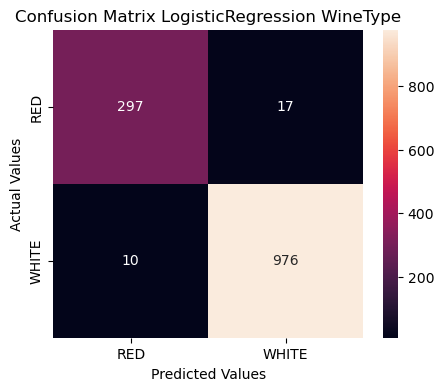

In [625]:
from sklearn.metrics import confusion_matrix

# Creating  a confusion matrix,which compares the actuals y_test and predictions y_pred
cm = confusion_matrix(actual_results_WT, preds_LR_WT)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['RED','WHITE'], 
                     columns = ['RED','WHITE'])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix LogisticRegression WineType')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [626]:

# RF_WT_acc = accuracy_score(y_test, preds_RF_WT)
from sklearn.metrics import confusion_matrix

cm_RF_WT = confusion_matrix(y_test, preds_RF_WT)
cm_RF_WT


array([[310,   4],
       [  0, 986]], dtype=int64)

In [627]:
cm_df_RF_WT = pd.DataFrame(cm_RF_WT,
  index = ["RED","WHITE"],
  columns = ["RED","WHITE"]
)
cm_df_RF_WT



,RED,WHITE
RED,310,4
WHITE,0,986


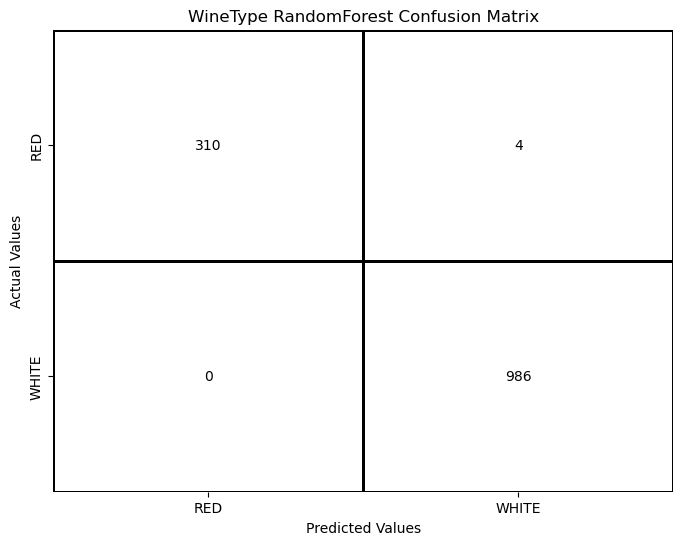

In [628]:
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df_RF_WT, annot=True, cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"}, fmt='g')
plt.title('WineType RandomForest Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

## Quality label

In [537]:
# check overall accuracy %
LR_QL_acc = accuracy_score(actual_results_QL, preds_LR_QL)
RF_QL_acc = accuracy_score(actual_results_QL, preds_RF_QL)

print("Logistic Regression: ", LR_QL_acc, "\nRandom Forest: ", RF_QL_acc)

Logistic Regression:  0.7230769230769231 
Random Forest:  0.83


In [566]:

cm_LR_QL = confusion_matrix(actual_results_QL, preds_LR_QL)
cm_LR_QL

array([[  0,   0,  32],
       [  0, 284, 184],
       [  0, 144, 656]], dtype=int64)

In [567]:
# high 0, low 1, medium 2

cm_df_LR_QL = pd.DataFrame(cm_LR_QL,
  index = ["high","low","medium"],
  columns = ["high","low","medium"]
)
cm_df_LR_QL

,high,low,medium
high,0,0,32
low,0,284,184
medium,0,144,656


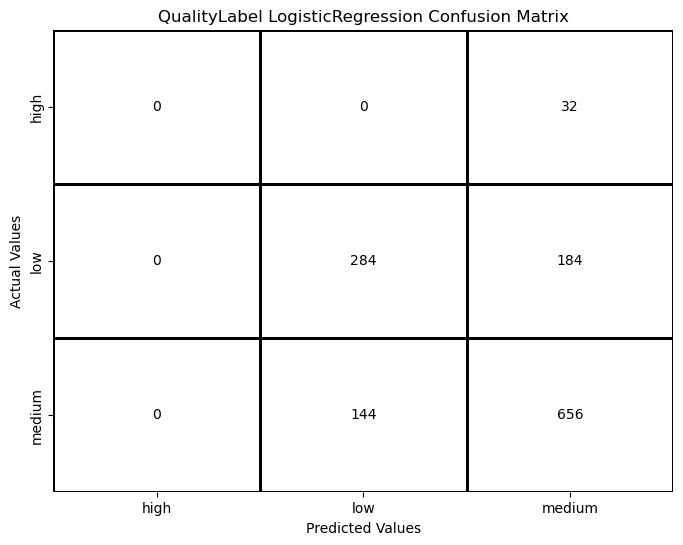

In [568]:
plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
cmap = sns.color_palette(["#FFFFFF"])

sns.heatmap(cm_df_LR_QL, annot=True, cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"}, fmt='g')
plt.title('QualityLabel LogisticRegression Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

[[  8   1  23]
 [  0 361 107]
 [  0  90 710]]


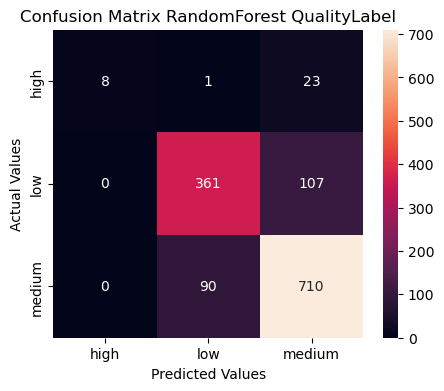

In [584]:
# high 0, low 1, medium 2
# alpha = ['high', 'low', 'medium']

# Creating  a confusion matrix,which compares the actuals y_test and predictions y_pred
cm_QL_RF = confusion_matrix(actual_results_QL, preds_RF_QL)
print(cm_QL_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_QL_RF = pd.DataFrame(cm_QL_RF,
                       index = ["high","low","medium"],
                       columns = ["high","low","medium"])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_QL_RF, annot=True, fmt='g')
plt.title('Confusion Matrix RandomForest QualityLabel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

[[  8   1  23]
 [  0 361 107]
 [  0  90 710]]


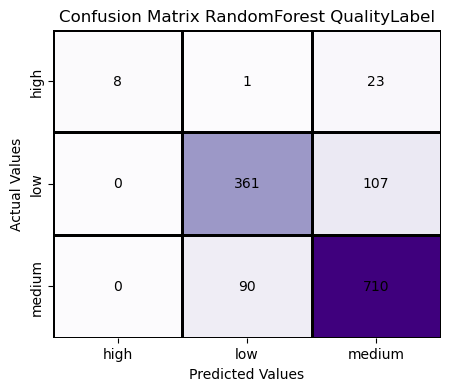

In [ ]:
cm_QL_RF = confusion_matrix(actual_results_QL, preds_RF_QL)
print(cm_QL_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_QL_RF = pd.DataFrame(cm_QL_RF,
                       index = ["high","low","medium"],
                       columns = ["high","low","medium"])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
# plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

# sns.heatmap(cm_df_QL_RF, annot=True, fmt='g')
# sns.heatmap(cm_df_QL_RF, annot=True, cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"}, fmt='g')
sns.heatmap(cm_df_QL_RF, cmap="Purples", annot=True, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"}, fmt='g')

plt.title('Confusion Matrix RandomForest QualityLabel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
cm_QL_RF = confusion_matrix(actual_results_QL, preds_RF_QL)
print(cm_QL_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_QL_RF = pd.DataFrame(cm_QL_RF,
                       index = ["high","low","medium"],
                       columns = ["high","low","medium"])

#Plotting the 3x3 confusion matrix
plt.figure(figsize=(5,4))
# plt.figure(figsize=(8,6))

# Create a custom color map where all values are white
# cmap = sns.color_palette(["#FFFFFF"])

# sns.heatmap(cm_df_QL_RF, annot=True, fmt='g')
# sns.heatmap(cm_df_QL_RF, annot=True, cmap=cmap, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"}, fmt='g')
sns.heatmap(cm_df_QL_RF, cmap="Purples", annot=True, cbar=False, linewidths=.8, linecolor='black', annot_kws={"color": "black"}, fmt='g')

plt.title('Confusion Matrix RandomForest QualityLabel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Classification Report
## Wine type


In [572]:
from sklearn.metrics import classification_report
# print(classification_report(y_test, LR_preds))

# LR_WT_acc = accuracy_score(actual_results_WT, preds_LR_WT)
# RF_WT_acc = accuracy_score(actual_results_WT, preds_RF_WT)

report_WT_LR = classification_report(actual_results_WT, preds_LR_WT)
print(report_WT_LR)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       314
           1       0.98      0.99      0.99       986

    accuracy                           0.98      1300
   macro avg       0.98      0.97      0.97      1300
weighted avg       0.98      0.98      0.98      1300



In [573]:
report_WT_RF = classification_report(actual_results_WT, preds_RF_WT)
print(report_WT_RF)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       314
           1       1.00      1.00      1.00       986

    accuracy                           1.00      1300
   macro avg       1.00      0.99      1.00      1300
weighted avg       1.00      1.00      1.00      1300



## Quality label

In [585]:
report_QL_LR = classification_report(actual_results_QL, preds_LR_QL, zero_division=0.0)
print(report_QL_LR)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.66      0.61      0.63       468
           2       0.75      0.82      0.78       800

    accuracy                           0.72      1300
   macro avg       0.47      0.48      0.47      1300
weighted avg       0.70      0.72      0.71      1300



In [ ]:
report_QL_RF = classification_report(actual_results_QL, preds_RF_QL)
print(report_QL_RF)

              precision    recall  f1-score   support

           0       1.00      0.25      0.40        32
           1       0.80      0.77      0.78       468
           2       0.85      0.89      0.87       800

    accuracy                           0.83      1300
   macro avg       0.88      0.64      0.68      1300
weighted avg       0.83      0.83      0.83      1300



# Cohen's Kappa Coefficient

## Wine Type

In [ ]:
from sklearn.metrics import cohen_kappa_score
print("Cohen's kappa coefficient for WineType LogisticRegression", "\n", cohen_kappa_score(actual_results_WT, preds_LR_WT))
print("Cohen's kappa coefficient for WineType RandomForest", "\n", cohen_kappa_score(actual_results_WT, preds_RF_WT))

Cohen's kappa coefficient for WineType LogisticRegression 
 0.9428807623709529
Cohen's kappa coefficient for WineType RandomForest 
 0.9915655615389606


## Quality Label

In [582]:
print("Cohen's kappa coefficient for QualityLabel LogisticRegression", "\n", cohen_kappa_score(actual_results_QL, preds_LR_QL))
print("Cohen's kappa coefficient for QualityLabel RandomForest", "\n", cohen_kappa_score(actual_results_QL, preds_RF_QL))

Cohen's kappa coefficient for QualityLabel LogisticRegression 
 0.4091625257544539
Cohen's kappa coefficient for QualityLabel RandomForest 
 0.643640350877193
